<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Predicting Shots Made Per Game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties — ridge, lasso, and elastic net — to try and predict how many shots Kobe Bryant made per game during his career.

The Kobe Shots data set contains hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model, considering the limited number of observations (games) we have available. Plus, many of the predictors have significant multicollinearity. 


**Warning:** Some of these calculations are computationally expensive and may take a while to execute. It may be worthwhile to only use a portion of the data to perform these calculations, especially if you've experienced kernel issues in the past.

---

### 1) Load packages and data.

In [209]:
import numpy as np
import pandas as pd


from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [210]:
df = pd.read_csv('./datasets/kobe_superwide_games.csv')

---

### 2) Examine the data.

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why might regularization be particularly useful for modeling this data?

In [175]:
len(df.columns)  #woah

645

In [211]:
df.shape  #kinda gross

(1558, 645)

In [212]:
df.columns

Index(['SHOTS_MADE', 'AWAY_GAME', 'SEASON_OPPONENT:atl:1996-97',
       'SEASON_OPPONENT:atl:1997-98', 'SEASON_OPPONENT:atl:1999-00',
       'SEASON_OPPONENT:atl:2000-01', 'SEASON_OPPONENT:atl:2001-02',
       'SEASON_OPPONENT:atl:2002-03', 'SEASON_OPPONENT:atl:2003-04',
       'SEASON_OPPONENT:atl:2004-05',
       ...
       'ACTION_TYPE:tip_layup_shot', 'ACTION_TYPE:tip_shot',
       'ACTION_TYPE:turnaround_bank_shot',
       'ACTION_TYPE:turnaround_fadeaway_bank_jump_shot',
       'ACTION_TYPE:turnaround_fadeaway_shot',
       'ACTION_TYPE:turnaround_finger_roll_shot',
       'ACTION_TYPE:turnaround_hook_shot', 'ACTION_TYPE:turnaround_jump_shot',
       'SEASON_GAME_NUMBER', 'CAREER_GAME_NUMBER'],
      dtype='object', length=645)

---

### 3) Create predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [213]:
df.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,SEASON_OPPONENT:atl:2005-06,SEASON_OPPONENT:atl:2006-07,SEASON_OPPONENT:atl:2007-08,SEASON_OPPONENT:atl:2008-09,SEASON_OPPONENT:atl:2009-10,SEASON_OPPONENT:atl:2010-11,SEASON_OPPONENT:atl:2011-12,SEASON_OPPONENT:atl:2012-13,SEASON_OPPONENT:atl:2013-14,SEASON_OPPONENT:atl:2014-15,SEASON_OPPONENT:atl:2015-16,SEASON_OPPONENT:bkn:2012-13,SEASON_OPPONENT:bkn:2015-16,SEASON_OPPONENT:bos:1996-97,SEASON_OPPONENT:bos:1997-98,SEASON_OPPONENT:bos:1999-00,SEASON_OPPONENT:bos:2001-02,SEASON_OPPONENT:bos:2002-03,SEASON_OPPONENT:bos:2003-04,SEASON_OPPONENT:bos:2004-05,SEASON_OPPONENT:bos:2005-06,SEASON_OPPONENT:bos:2006-07,SEASON_OPPONENT:bos:2007-08,SEASON_OPPONENT:bos:2008-09,SEASON_OPPONENT:bos:2009-10,SEASON_OPPONENT:bos:2010-11,SEASON_OPPONENT:bos:2011-12,SEASON_OPPONENT:bos:2012-13,SEASON_OPPONENT:bos:2014-15,SEASON_OPPONENT:bos:2015-16,SEASON_OPPONENT:cha:1996-97,SEASON_OPPONENT:cha:1997-98,SEASON_OPPONENT:cha:1998-99,SEASON_OPPONENT:cha:1999-00,SEASON_OPPONENT:cha:2000-01,SEASON_OPPONENT:cha:2001-02,SEASON_OPPONENT:cha:2004-05,SEASON_OPPONENT:cha:2005-06,SEASON_OPPONENT:cha:2006-07,SEASON_OPPONENT:cha:2007-08,SEASON_OPPONENT:cha:2008-09,SEASON_OPPONENT:cha:2009-10,SEASON_OPPONENT:cha:2010-11,SEASON_OPPONENT:cha:2011-12,SEASON_OPPONENT:cha:2012-13,SEASON_OPPONENT:cha:2013-14,SEASON_OPPONENT:cha:2014-15,SEASON_OPPONENT:cha:2015-16,SEASON_OPPONENT:chi:1996-97,SEASON_OPPONENT:chi:1997-98,SEASON_OPPONENT:chi:1999-00,SEASON_OPPONENT:chi:2000-01,SEASON_OPPONENT:chi:2001-02,SEASON_OPPONENT:chi:2002-03,SEASON_OPPONENT:chi:2003-04,SEASON_OPPONENT:chi:2004-05,SEASON_OPPONENT:chi:2005-06,SEASON_OPPONENT:chi:2006-07,SEASON_OPPONENT:chi:2007-08,SEASON_OPPONENT:chi:2008-09,SEASON_OPPONENT:chi:2009-10,SEASON_OPPONENT:chi:2010-11,SEASON_OPPONENT:chi:2011-12,SEASON_OPPONENT:chi:2012-13,SEASON_OPPONENT:chi:2015-16,SEASON_OPPONENT:cle:1996-97,SEASON_OPPONENT:cle:1997-98,SEASON_OPPONENT:cle:1998-99,SEASON_OPPONENT:cle:1999-00,SEASON_OPPONENT:cle:2000-01,SEASON_OPPONENT:cle:2001-02,SEASON_OPPONENT:cle:2002-03,SEASON_OPPONENT:cle:2003-04,SEASON_OPPONENT:cle:2004-05,SEASON_OPPONENT:cle:2005-06,SEASON_OPPONENT:cle:2006-07,SEASON_OPPONENT:cle:2007-08,SEASON_OPPONENT:cle:2008-09,SEASON_OPPONENT:cle:2009-10,SEASON_OPPONENT:cle:2010-11,SEASON_OPPONENT:cle:2011-12,SEASON_OPPONENT:cle:2012-13,SEASON_OPPONENT:cle:2014-15,SEASON_OPPONENT:cle:2015-16,SEASON_OPPONENT:dal:1996-97,SEASON_OPPONENT:dal:1997-98,SEASON_OPPONENT:dal:1998-99,SEASON_OPPONENT:dal:1999-00,SEASON_OPPONENT:dal:2000-01,SEASON_OPPONENT:dal:2001-02,SEASON_OPPONENT:dal:2002-03,SEASON_OPPONENT:dal:2003-04,SEASON_OPPONENT:dal:2004-05,SEASON_OPPONENT:dal:2005-06,SEASON_OPPONENT:dal:2006-07,SEASON_OPPONENT:dal:2007-08,SEASON_OPPONENT:dal:2008-09,SEASON_OPPONENT:dal:2009-10,SEASON_OPPONENT:dal:2010-11,SEASON_OPPONENT:dal:2011-12,SEASON_OPPONENT:dal:2012-13,SEASON_OPPONENT:dal:2014-15,SEASON_OPPONENT:dal:2015-16,SEASON_OPPONENT:den:1996-97,SEASON_OPPONENT:den:1997-98,SEASON_OPPONENT:den:1998-99,SEASON_OPPONENT:den:1999-00,SEASON_OPPONENT:den:2000-01,SEASON_OPPONENT:den:2001-02,SEASON_OPPONENT:den:2002-03,SEASON_OPPONENT:den:2003-04,SEASON_OPPONENT:den:2004-05,SEASON_OPPONENT:den:2005-06,SEASON_OPPONENT:den:2006-07,SEASON_OPPONENT:den:2007-08,SEASON_OPPONENT:den:2008-09,SEASON_OPPONENT:den:2009-10,SEASON_OPPONENT:den:2010-11,SEASON_OPPONENT:den:2011-12,SEASON_OPPONENT:den:2012-13,SEASON_OPPONENT:den:2014-15,SEASON_OPPONENT:den:2015-16,SEASON_OPPONENT:det:1996-97,SEASON_OPPONENT:det:1997-98,SEASON_OPPONENT:det:1999-00,SEASON_OPPONENT:det:2000-01,SEASON_OPPONENT:det:2001-02,SEASON_OPPONENT:det:2002-03,SEASON_OPPONENT:det:2003-04,SEASON_OPPONENT:det:2004-05,SEASON_OPPONENT:det:2005-06,SEASON_OPPONENT:det:2006-07,SEASON_OPPONENT:det:2007-08,SEASON_OPPONENT:det:2008-09,SE

In [214]:
X = df.drop('SHOTS_MADE', axis = 1)
y = df['SHOTS_MADE']

In [215]:
#instantiate standard scaler

##NOTE: in this lab, they don't ask for a train test split, they ask for a cross val score, so we're just going to scale all of the data. 
# Tyically, you'd want to do a train test split

ss = StandardScaler()

Xs = ss.fit_transform(X)


/Users/heatherrobbins/env3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/heatherrobbins/env3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [216]:
#instantiate model object

lr = LinearRegression()

cross_val_score(lr, Xs, y, cv = 10) 

#Wow... these scores really suck.

array([-4.83113806e+28, -1.44049554e+28, -3.59018194e+27, -1.32197563e+27,
       -4.56240756e+27, -8.82786562e+27, -2.10072078e+27, -1.47616712e+27,
       -2.84048860e+27, -1.29019955e+28])

In [218]:
cross_val_score(lr, Xs, y, cv = 10).mean()

-1.003381386595802e+28

In [219]:
# The mean R^2 is extremely negative. All of the R^2 scores are negative in cross-validation.
# It's probably dramatically overfitting, and the redundant variables are affecting
# the coefficients in unusual ways.

---

### 5) Find an optimal value for the ridge regression alpha using `RidgeCV`.

Go to the documentation and [read how RidgeCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

> *Hint: Once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that ridge performs best when searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit.


In [220]:
%%time

ridge_alphas = np.logspace(0, 5, 100)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Xs, y)

print(optimal_ridge.alpha_)  #this is our optimal alpha to feed into the ridge linear model

599.4842503189409
CPU times: user 53.8 s, sys: 54 s, total: 1min 47s
Wall time: 12.3 s


/Users/heatherrobbins/env3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


---

### 6) Cross-validate the ridge regression $R^2$ with the optimal alpha.

Is it better than the linear regression? If so, why might this be?

In [221]:
#instantiate the ridge model and set our alpha to be our optimal alpha

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xs, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))  #Waaayyyyyyyy better

[0.60354951 0.53005223 0.48600605 0.58938973 0.51686265 0.52833247
 0.52790845 0.40875612 0.38700321 0.43969737]
0.5017557802723521


In [185]:
# It's vastly better than the plain linear regression. 
# There's likely so much multicollinearity in the data that linear regression
# overfits and has bogus coefficients on predictors. Ridge is 
# able to manage the multicollinearity and get a good out-of-sample result.

In [222]:
##Let's take a peek at our coefficients. To do this we have to fit our data to the ridge model

ridge.fit(Xs, y)


Ridge(alpha=599.4842503189409, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [224]:
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef': abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

,variable,coef,abs_coef
574,SHOT_TYPE:2pt_field_goal,0.278986,0.278986
579,COMBINED_SHOT_TYPE:jump_shot,0.264177,0.264177
569,SHOT_ZONE_AREA:center(c),0.261213,0.261213
556,SHOT_ZONE_RANGE:16-24_ft.,0.237277,0.237277
577,COMBINED_SHOT_TYPE:dunk,0.232823,0.232823
582,SECONDS_REMAINING,0.227098,0.227098
584,PERIOD,0.223821,0.223821
566,SHOT_ZONE_BASIC:restricted_area,0.220295,0.220295
565,SHOT_ZONE_BASIC:mid-range,0.218809,0.218809
573,SHOT_ZONE_AREA:right_side(r),0.180409,0.180409


---

### 7) Find an optimal value for lasso regression alpha using `LassoCV`.

Go to the documentation and [read how LassoCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). It is very similar to `RidgeCV`.

> *Hint: Again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that lasso, unlike ridge, performs best when searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide what alphas to use itself by setting the keyword argument `n_alphas=` to however many alphas you want it to search over. We recommend letting scikit-learn choose the range of alphas.

_**Tip:** If you find your CV taking a long time and you're not sure if it's working, set `verbose =1`._

In [188]:
##You can actually let the LassoCV decide what alphas to use itself by setting the keyword argument n_alphas= t

In [227]:
%%time
optimal_lasso = LassoCV(n_alphas=500, cv=5)
optimal_lasso.fit(Xs, y)

print(optimal_lasso.alpha_)

0.05751220543165791
CPU times: user 27.9 s, sys: 4.56 s, total: 32.5 s
Wall time: 5.7 s


---

### 8) Cross-validate the lasso $R^2$ with the optimal alpha.

Is it better than the linear regression? Is it better than ridge? What do the differences in results imply about the issues with the data set?

In [228]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.62297435 0.52601665 0.53757036 0.61520994 0.54344862 0.55467151
 0.53063549 0.44706724 0.46407576 0.50949776]
0.5351167686421365


In [229]:
# The lasso performs similarly but slightly better than the ridge.
# Lasso deals primarily with the feature selection of valuable variables,
# eliminating ones that aren't useful. This also takes care of multicollinearity,
# but in a different way: It'll choose the "best" of the correlated variables
# and zero out the redundant ones.
# There may also be useless variables in the data, which it simply gets rid
# of entirely.

---

### 9) Look at the coefficients for variables in the lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original data set are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** If you only fit the lasso within `cross_val_score`, you'll have to refit it outside of that function to pull out the coefficients.

In [230]:
lasso.fit(Xs, y)

Lasso(alpha=0.057648392525239116, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [231]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef': abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
579,COMBINED_SHOT_TYPE:jump_shot,1.262795,1.262795
574,SHOT_TYPE:2pt_field_goal,0.832759,0.832759
566,SHOT_ZONE_BASIC:restricted_area,0.467598,0.467598
611,ACTION_TYPE:jump_shot,-0.282456,0.282456
577,COMBINED_SHOT_TYPE:dunk,0.278330,0.278330
575,SHOT_TYPE:3pt_field_goal,0.139793,0.139793
612,ACTION_TYPE:layup_shot,-0.139640,0.139640
423,SEASON_OPPONENT:sac:1999-00,0.139575,0.139575
233,SEASON_OPPONENT:mem:2009-10,0.126999,0.126999
549,SEASON:2015-16,-0.124477,0.124477


In [194]:
print('Percent variables zeroed out:', np.sum((abs(lasso.coef_) == 0.0))/float(X.shape[1]))

Percent variables zeroed out: 0.7422360248447205


---

### 10) Find an optimal value for elastic net regression alpha using `ElasticNetCV`.

Go to the documentation and [read how ElasticNetCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note that here you'll be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: Strength of regularization.
- `l1_ratio`: Amount of ridge vs. lasso (0 = all ridge, 1 = all lasso).
    
Do not include 0 in the search for `l1_ratio` — it won't allow it and will break.

You can use `n_alphas` for the alpha parameters instead of setting your own values, which we highly recommend.

Also, be careful setting too many l1_ratios over cross-validation folds in your search. It can take a long time if you choose too many combinations and, for the most part, there are diminishing returns in this data.

In [232]:
ratios  = np.linspace(0.01, 1.0, 100)  #You'll search over the possible ratios of l1 to l2 regularization
#for alphas, it's similar to lasso where you tell it how many alphas to search over and it'll figure out on the back end 

In [233]:
optimal_enet = ElasticNetCV(l1_ratio=ratios, n_alphas=200, cv=5)

In [234]:
optimal_enet.fit(Xs, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.01, 0.02, ..., 0.99, 1.  ]), max_iter=1000,
       n_alphas=200, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [235]:
print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.058824890331876614
0.98


---

### 11) Cross-validate the elastic net $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the ridge and lasso regularized regressions?

In [236]:
# A:

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xs, y, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.62428707 0.52644864 0.53727216 0.61544153 0.54354191 0.55480397
 0.53021682 0.44702805 0.46383487 0.51018444]
0.5353059446973912


---

### 12. [Bonus] Compare the residuals for ridge and lasso visually.


In [238]:
# A: 
ridge.fit(Xs, y)
lasso.fit(Xs, y)

Lasso(alpha=0.057648392525239116, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
# Model residuals:

ridge_resid = y - ridge.predict(Xs)
lasso_resid = y - lasso.predict(Xs)

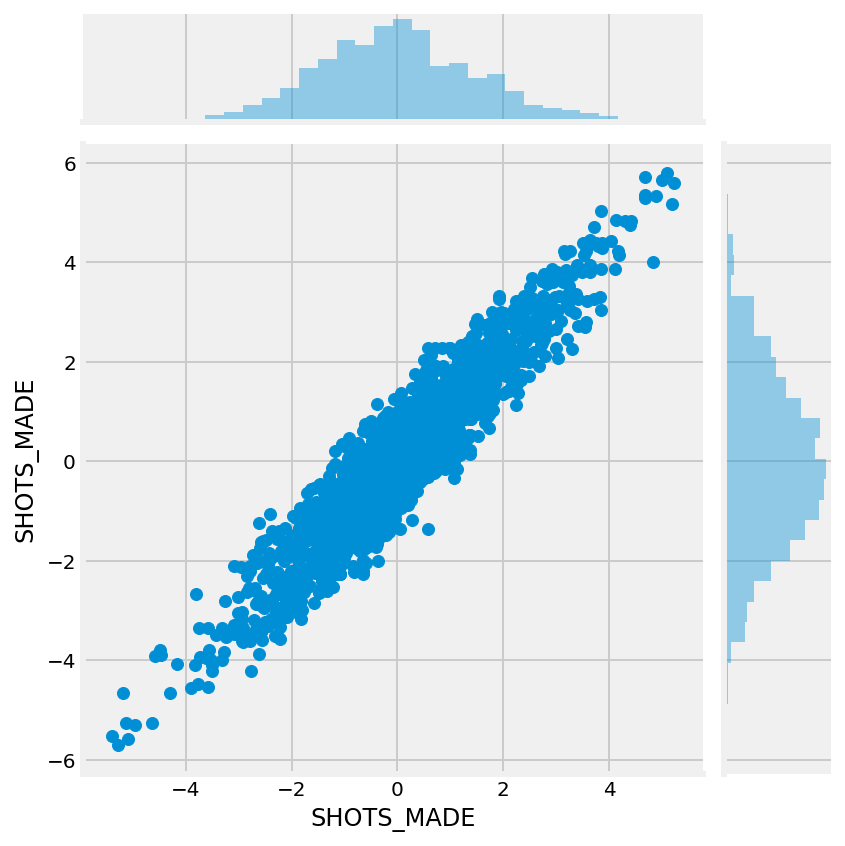

In [240]:
sns.jointplot(ridge_resid, lasso_resid)